## **TMDB Movie Dataset Modeling**

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,\
precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

# Initialize Plotly to run in offline mode in Jupyter notebooks
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### *Read and prepare data*

In [2]:
data = pd.read_csv('clean_data.csv')

In [3]:
data.head()

,original_language,runtime,popularity,vote_average,Num_genres,Num_keywords,Num_production_companies,Num_production_countries,Num_spoken_languages,Num_overview_words,Num_tagline_words,Num_Departments,Num_Cast,Num_Crew,Year,Month,Day,Is_profitable
0,4,169.0,139.082615,6.9,3,16,3,1,1,34,9,9,34,32,2007,5,19,1
1,4,148.0,107.376788,6.3,3,7,3,2,5,41,5,11,83,155,2015,10,26,1
2,4,165.0,112.312950,7.6,4,21,4,1,1,65,3,11,158,217,2012,7,16,1
3,4,132.0,43.926995,6.1,3,16,1,1,1,55,7,11,27,132,2012,3,7,1
4,4,139.0,115.699814,5.9,3,16,3,1,2,45,3,9,143,56,2007,5,1,1


In [4]:
data.Is_profitable.value_counts()

Is_profitable
1    2411
0    1270
Name: count, dtype: int64

In [5]:
# Define features and target variable
X = data.drop(['Is_profitable'], axis=1)    # Features
y = data['Is_profitable']  # Target variable

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
 # Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### *Example: Logistic Regression*

In [8]:
 # Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
 # Evaluate the model
y_pred = model.predict(X_test)      # Make predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.05%


Classification Report:
              precision    recall  f1-score   support

Unprofitable       0.69      0.66      0.67       229
  Profitable       0.85      0.87      0.86       508

    accuracy                           0.80       737
   macro avg       0.77      0.76      0.76       737
weighted avg       0.80      0.80      0.80       737



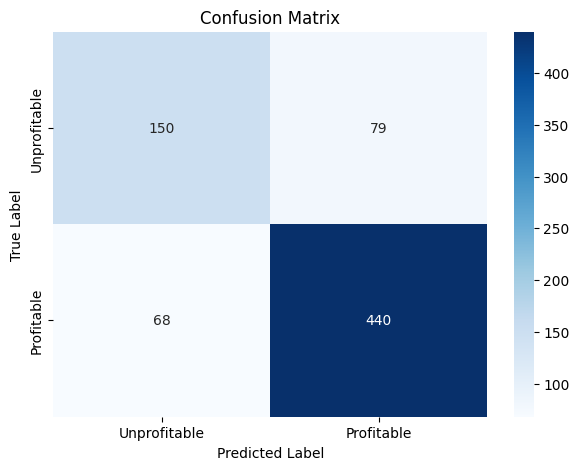

In [10]:
# Get classification report
report = classification_report(y_test, y_pred, target_names=['Unprofitable', 'Profitable'])

# Plot classification report
print("Classification Report:")
print(report)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unprofitable', 'Profitable'], yticklabels=['Unprofitable', 'Profitable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

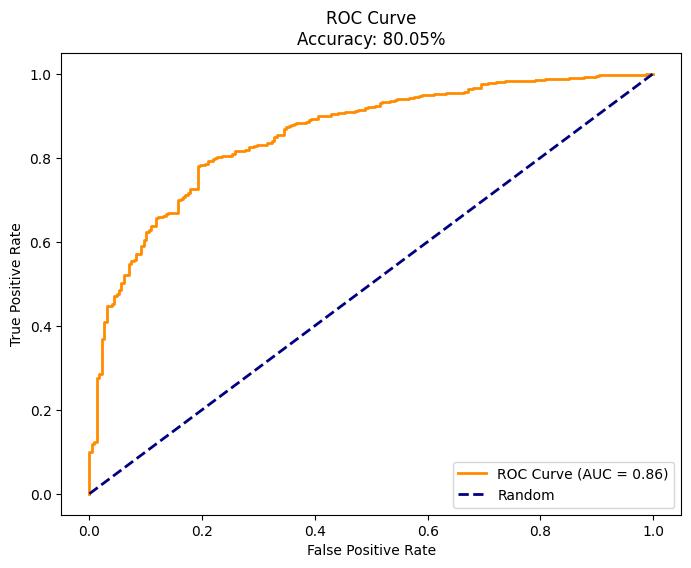

In [11]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.show()

### *Compare desired ML models*

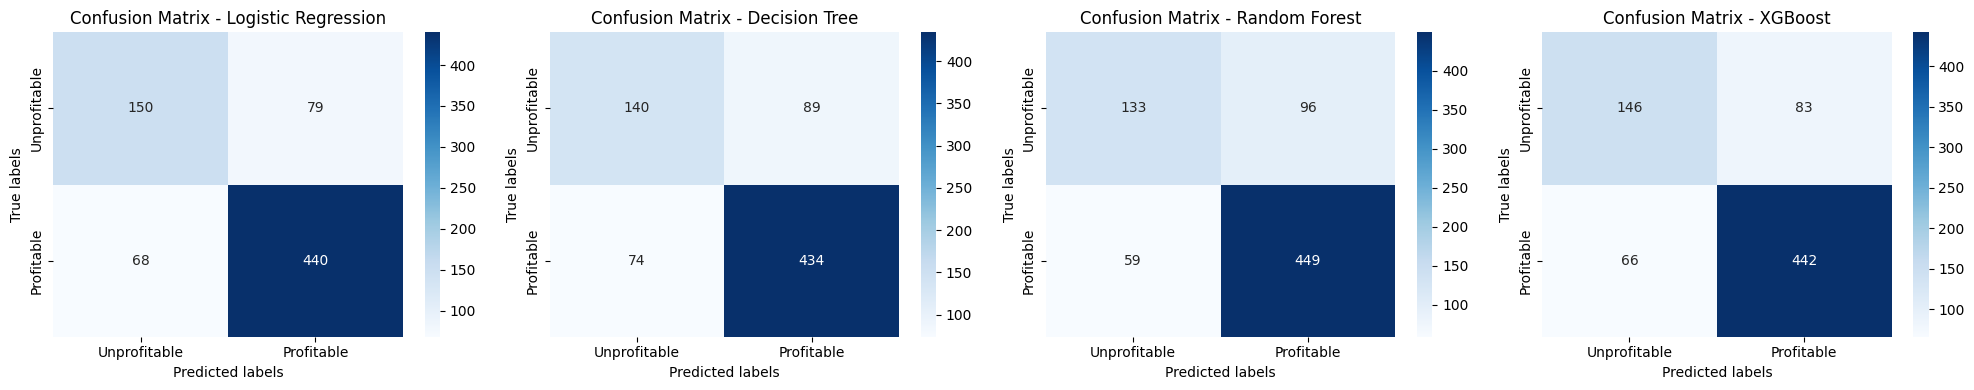



Sorted Evaluation Results based on Accuracy:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.800543,0.847784,0.866142,0.856865,0.855775
XGBoost,0.797829,0.841905,0.870079,0.855760,0.852663
Random Forest,0.789688,0.823853,0.883858,0.852802,0.844282
Decision Tree,0.778833,0.829828,0.854331,0.841901,0.818979


In [12]:
# Models initialization
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8, random_state=42)
}

# Store results in a dataframe
results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Initialize lists to store ROC curve data
roc_curves = []

# Initialize figure for confusion matrices
fig_confusion_matrices = plt.figure(figsize=(20, 4))

# Initialize figure for ROC curves
fig_roc_curves = go.Figure()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Making predictions

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC curve and score
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability predictions for class 1
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=fig_confusion_matrices.add_subplot(1, len(models), idx+1),
                 xticklabels=['Unprofitable', 'Profitable'], yticklabels=['Unprofitable', 'Profitable'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # Add results to dataframe
    results_df.loc[name] = [accuracy, precision, recall, f1, roc_auc]

    # ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_curves.append((name, fpr, tpr, roc_auc))

    # Add ROC curve trace to the plotly figure
    fig_roc_curves.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{name} (AUC = {roc_auc:.2f})'))

fig_confusion_matrices.tight_layout()
plt.show()

# Layout settings for ROC curve plot
fig_roc_curves.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
fig_roc_curves.update_layout(title='ROC Curve',
                             xaxis_title='False Positive Rate',
                             yaxis_title='True Positive Rate',
                             title_x=0.5,
                             width=800,
                             height=500,
                             margin=dict(l=50, r=50, t=50, b=50))
iplot(fig_roc_curves)

# Sort dataframe based on accuracy
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

print("\n\nSorted Evaluation Results based on Accuracy:")
results_df_sorted